In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold = np.nan)
def loadData():
    with np.load('notMNIST.npz') as data :
        Data, Target = data ['images'], data['labels']
        #print(Data[3745])
        #plt.figure()
        #plt.imshow(Data[3745])
        #plt.show()
        #print(Target)     # 0-9
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        #true =1 false=-1?
        #print(dataIndx)   #true or false
        #print(Data[dataIndx])  #Data[true]
        Data = Data[dataIndx]/255.
        #print(Data[0])
        Target = Target[dataIndx].reshape(-1, 1)
        #print(Target[10])
        #Target [size, 1]
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        #print(randIndx)
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        #print(Target)
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

In [8]:
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()

In [12]:
def buildGraph(loss=None):
    #Initialize weight and bias tensors
    tf.set_random_seed(421)
    X = tf.placeholder("float")
    Y = tf.placeholder("float")
    w = tf.Variable(0.0, name="weight")
    b = tf.Variable(0.0, name="bias")
    loss = tf.square(Y - X*w - b)
    train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)


In [13]:
for i in range(0,len(trainTarget)):
    train_X = trainData[i].flatten()
train_Y = trainTarget
        
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

    epoch = 1
    for i in range(10):
        for (x, y) in zip(train_X, train_Y):
            _, w_value, b_value = sess.run([train_op, w, b],feed_dict={X: x,Y: y})
        print("Epoch: {}, w: {}, b: {}".format(epoch, w_value, b_value))
        epoch += 1

NameError: name 'train_op' is not defined

Epoch: 1, w: -0.8393111228942871, b: 9.725666999816895
Epoch: 2, w: 0.3367823362350464, b: 10.494192123413086
Epoch: 3, w: 1.1427496671676636, b: 10.343145370483398
Epoch: 4, w: 1.5795530080795288, b: 10.196051597595215
Epoch: 5, w: 1.805167317390442, b: 10.112133026123047
Epoch: 6, w: 1.9203426837921143, b: 10.068283081054688
Epoch: 7, w: 1.9789693355560303, b: 10.045829772949219
Epoch: 8, w: 2.0087876319885254, b: 10.034395217895508
Epoch: 9, w: 2.0239510536193848, b: 10.02857780456543
Epoch: 10, w: 2.0316624641418457, b: 10.025617599487305


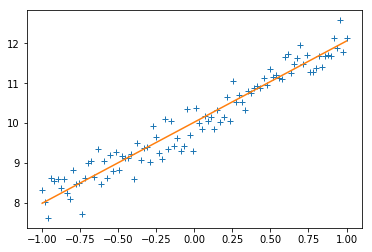

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Prepare train data
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.33 + 10

# Define the model
X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")
loss = tf.square(Y - X*w - b)
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# Create session to run
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

    epoch = 1
    for i in range(10):
        for (x, y) in zip(train_X, train_Y):
            _, w_value, b_value = sess.run([train_op, w, b],feed_dict={X: x,Y: y})
        print("Epoch: {}, w: {}, b: {}".format(epoch, w_value, b_value))
        epoch += 1


#draw
plt.plot(train_X,train_Y,"+")
plt.plot(train_X,train_X.dot(w_value)+b_value)
